                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     35.05
Date:                Sat, 23 Aug 2025   Prob (F-statistic):           1.90e-07
Time:                        15:43:26   Log-Likelihood:                -90.189
No. Observations:                  20   AIC:                             190.4
Df Residuals:                      15   BIC:                             195.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        191.9158     41.666      4.606      0.0

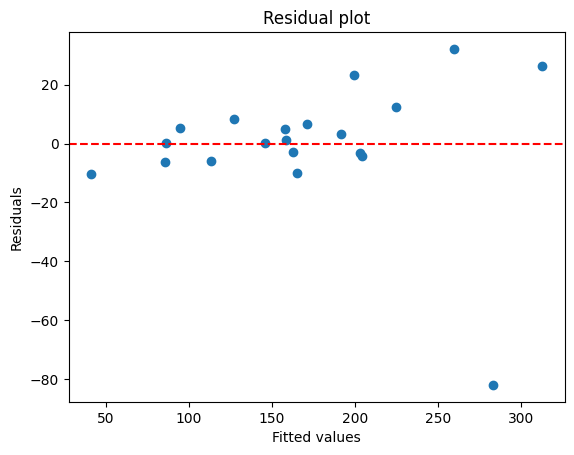

逐步回归选择的变量索引（0-based）: [0 1]
逐步回归得到的系数: [1.46830574 0.66225049] 截距: 52.57734888208951


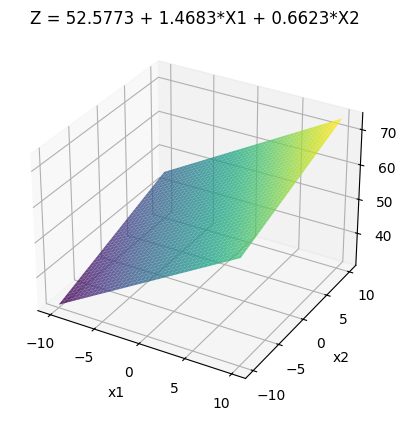

In [2]:
# pip install statsmodels scikit-learn matplotlib numpy

import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

# =========================
# 1. 建筑材料公司销售量因素分析
# =========================
x1 = np.array([5.5,2.5,8.0,3.0,3.0,2.9,8.0,9.0,4.0,6.5,5.5,5.0,6.0,5.0,3.5,8.0,6.0,4.0,7.5,7.0])
x2 = np.array([31,55,67,50,38,71,30,56,42,73,60,44,50,39,55,70,40,50,62,59])
x3 = np.array([10,8,12,7,8,12,12,5,8,5,11,12,6,10,10,6,11,11,9,9])
x4 = np.array([8,6,9,16,15,17,8,10,4,16,7,12,6,4,4,14,6,8,13,11])
y  = np.array([79.3,200.1,163.2,200.1,146.0,177.7,30.9,291.9,160.0,339.4,
               159.6,86.3,237.5,107.2,155.0,201.4,100.2,135.8,223.3,195.0])

X = np.column_stack([x1,x2,x3,x4])
X_sm = sm.add_constant(X)   # 添加常数项
model = sm.OLS(y, X_sm).fit()
print(model.summary())

# 残差图 (近似 MATLAB rcoplot)
resid = model.resid
fitted = model.fittedvalues
plt.figure()
plt.scatter(fitted, resid)
plt.axhline(0, ls='--', color='red')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residual plot")
plt.show()

# =========================
# 2. 水泥凝固放热分析 - 逐步回归
# =========================
x1 = np.array([7,1,11,11,7,11,3,1,2,21,1,11,10])
x2 = np.array([26,29,56,31,52,55,71,31,54,47,40,66,68])
x3 = np.array([6,15,8,8,6,9,17,22,18,4,23,9,8])
x4 = np.array([60,52,20,47,33,22,6,44,22,26,34,12,12])
y  = np.array([78.5,74.3,104.3,87.6,95.9,109.2,102.7,72.5,93.1,115.9,83.8,113.3,109.4])

X = np.column_stack([x1,x2,x3,x4])

# 顺序特征选择（逐步回归模拟）
lr = LinearRegression()
sfs = SequentialFeatureSelector(lr, n_features_to_select=2, direction='forward').fit(X, y)
selected = sfs.get_support(indices=True)
print("逐步回归选择的变量索引（0-based）:", selected)

# 拟合选中变量
X_sel = X[:, selected]
lr.fit(X_sel, y)
print("逐步回归得到的系数:", lr.coef_, "截距:", lr.intercept_)

# =========================
# 3. 作图：回归平面 Z = 52.5773 + 1.4683*X1 + 0.6623*X2
# =========================
x1_range = np.arange(-10, 10.1, 0.1)
x2_range = np.arange(-10, 10.1, 0.1)
X1, X2 = np.meshgrid(x1_range, x2_range)
Z = 52.5773 + 1.4683*X1 + 0.6623*X2

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Z, cmap='viridis', alpha=0.8)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("z")
ax.set_title("Z = 52.5773 + 1.4683*X1 + 0.6623*X2")
plt.show()
